In [ ]:
%store

#### compare DEM for Boulder County
#### https://digital-geography.com/dem-comparison-srtm-3-vs-aster-gdem-v2/
##### The improved ASTER GDEM V2 adds 260,000 additional stereo-pairs, improving coverage and reducing the occurrence of artifacts. The refined production algorithm provides improved spatial resolution, increased horizontal and vertical accuracy, and superior water body coverage and detection. The ASTER GDEM V2 maintains the GeoTIFF format and the same gridding and tile structure as V1, with 30-meter postings and 1 x 1 degree tiles.
##### 30m at ground solution
##### passive system
##### from 83° north latitude to 83° south
##### released 2011
##### free download with an ECHO/REVERB account via FTP pull
##### still active

##### SRTM or the Shuttle Radar Topography Mission was started 1999 onboard the Endeavour and collected data for 11 days. As the orbit of the shuttle was not circumpolar but sinusoidal it was only possible to  cover a small portion of the earth surface. The shuttle therefore used the reflection of emitted radar signals in the so-called C-band (wavelength 5.6 cm) for the SIR-C sensor developed by the Jet Propulsion Laboratory and the X-band (wavelength 3.1 cm) for the X-SAR sensor developed by the German Aerospace Agency. The mission was clear: map the world!


##### 90m at ground worldwide
##### active system
##### from 60° north latitude to 58° south
##### acquired 2000 /different releases
##### free download without registering
##### once acquired, source data hasn’t changed

##### article indicates some of the ASTER is noisy

### https://appeears.earthdatacloud.nasa.gov/products


In [ ]:
# grab both datasets?
# ASTGTM v003
# ASTER Global Digital Elevation Model 1 arc second
# https://lpdaac.usgs.gov/products/astgtmv003/
# NASA Shuttle Radar Topography Mission Global 1 arc second
# https://lpdaac.usgs.gov/products/srtmgl1v003/


# https://appeears.earthdatacloud.nasa.gov/




In [ ]:
import rasterio
import rioxarray as rxr
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from rasterio.plot import show
from shapely.geometry import mapping

In [ ]:
# read the ASTER data 
dem_uri1 = "./dem/ASTGTM_NUMNC.003_ASTER_GDEM_NUM_doy2000061_aid0001.tif"

dem_da1 = rxr.open_rasterio(dem_uri1, mask_and_scale=True).squeeze()

dem_da1.plot()

In [ ]:
# read the SRTM data
dem_uri2 = "./dem/SRTMGL1_NC.003_SRTMGL1_DEM_doy2000042_aid0001.tif"

dem_da2 = rxr.open_rasterio(dem_uri1, mask_and_scale=True).squeeze()

dem_da2.plot()

In [ ]:
# from prompt to ChatGPT 
# To adjust the plot so that the Digital Elevation Model (DEM) of Boulder County 
# is more visually representative, rather than just a differential, 
# you can modify the plot by directly visualizing the DEM data with a colormap 
# that emphasizes elevation. Here's how you can achieve this:

# ASTER DATA

import rasterio
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from rasterio.mask import mask
from shapely.geometry import mapping

# Load the Boulder County shapefile
boulder_gdf = gpd.read_file("./boulder_county.shp")

# Filepath to the DEM file (replace with your DEM source file path)
dem_filepath = "./dem/ASTGTM_NUMNC.003_ASTER_GDEM_NUM_doy2000061_aid0001.tif"

# Open the DEM file
with rasterio.open(dem_filepath) as src:
    # Reproject Boulder County boundary to the DEM CRS
    dem_crs = src.crs  # CRS of the DEM
    boulder_reproject_gdf = boulder_gdf.to_crs(dem_crs)
    
    # Create a geometry mask for Boulder County
    boulder_geometry = [mapping(boulder_reproject_gdf.unary_union)]
    
    # Mask the DEM to only include data within Boulder County
    dem_data, out_transform = mask(src, boulder_geometry, crop=True)
    dem_data = dem_data[0]  # Extract the first band (assuming single-band data)
    meta = src.meta.copy()
    meta.update(
        {
            "driver": "GTiff",
            "height": dem_data.shape[0],
            "width": dem_data.shape[1],
            "transform": out_transform,
        }
    )

# Replace no-data values (if any) with NaN
nodata_value = meta.get("nodata", None)
if nodata_value is not None:
    dem_data = np.where(dem_data == nodata_value, np.nan, dem_data)

# Plot the DEM data
fig, ax = plt.subplots(figsize=(12, 10))

# Use a terrain colormap to visualize elevation
dem_img = ax.imshow(
    dem_data,
    cmap="terrain",  # Terrain colormap for elevation
    extent=(
        out_transform[2],
        out_transform[2] + out_transform[0] * dem_data.shape[1],
        out_transform[5] + out_transform[4] * dem_data.shape[0],
        out_transform[5],
    ),
    origin="upper",
)

# Plot Boulder County boundary
boulder_reproject_gdf.boundary.plot(ax=ax, edgecolor="red", linewidth=2, label="Boulder County Boundary")

# Add labels, colorbar, and legend
plt.colorbar(dem_img, ax=ax, label="Elevation (m)")
ax.legend()
plt.title("Digital Elevation Model (DEM) of Boulder County")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


In [ ]:
# from prompt to ChatGPT 
# To adjust the plot so that the Digital Elevation Model (DEM) of Boulder County 
# is more visually representative, rather than just a differential, 
# you can modify the plot by directly visualizing the DEM data with a colormap 
# that emphasizes elevation. Here's how you can achieve this:

# STRM data

import rasterio
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from rasterio.mask import mask
from shapely.geometry import mapping

# Load the Boulder County shapefile
boulder_gdf = gpd.read_file("./boulder_county.shp")

# Filepath to the DEM file (replace with your DEM source file path)
dem_filepath = "./dem/SRTMGL1_NC.003_SRTMGL1_DEM_doy2000042_aid0001.tif"

# Open the DEM file
with rasterio.open(dem_filepath) as src:
    # Reproject Boulder County boundary to the DEM CRS
    dem_crs = src.crs  # CRS of the DEM
    boulder_reproject_gdf = boulder_gdf.to_crs(dem_crs)
    
    # Create a geometry mask for Boulder County
    boulder_geometry = [mapping(boulder_reproject_gdf.unary_union)]
    
    # Mask the DEM to only include data within Boulder County
    dem_data, out_transform = mask(src, boulder_geometry, crop=True)
    dem_data = dem_data[0]  # Extract the first band (assuming single-band data)
    meta = src.meta.copy()
    meta.update(
        {
            "driver": "GTiff",
            "height": dem_data.shape[0],
            "width": dem_data.shape[1],
            "transform": out_transform,
        }
    )

# Replace no-data values (if any) with NaN
nodata_value = meta.get("nodata", None)
if nodata_value is not None:
    dem_data = np.where(dem_data == nodata_value, np.nan, dem_data)

# Plot the DEM data
fig, ax = plt.subplots(figsize=(12, 10))

# Use a terrain colormap to visualize elevation
dem_img = ax.imshow(
    dem_data,
    cmap="terrain",  # Terrain colormap for elevation
    extent=(
        out_transform[2],
        out_transform[2] + out_transform[0] * dem_data.shape[1],
        out_transform[5] + out_transform[4] * dem_data.shape[0],
        out_transform[5],
    ),
    origin="upper",
)

# Plot Boulder County boundary
boulder_reproject_gdf.boundary.plot(ax=ax, edgecolor="red", linewidth=2, label="Boulder County Boundary")

# Add labels, colorbar, and legend
plt.colorbar(dem_img, ax=ax, label="Elevation (m)")
ax.legend()
plt.title("Digital Elevation Model (DEM) of Boulder County")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


C:\Users\gpaul\AppData\Local\Temp\ipykernel_3284\2443963276.py:27: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  boulder_geometry = [mapping(boulder_reproject_gdf.unary_union)]


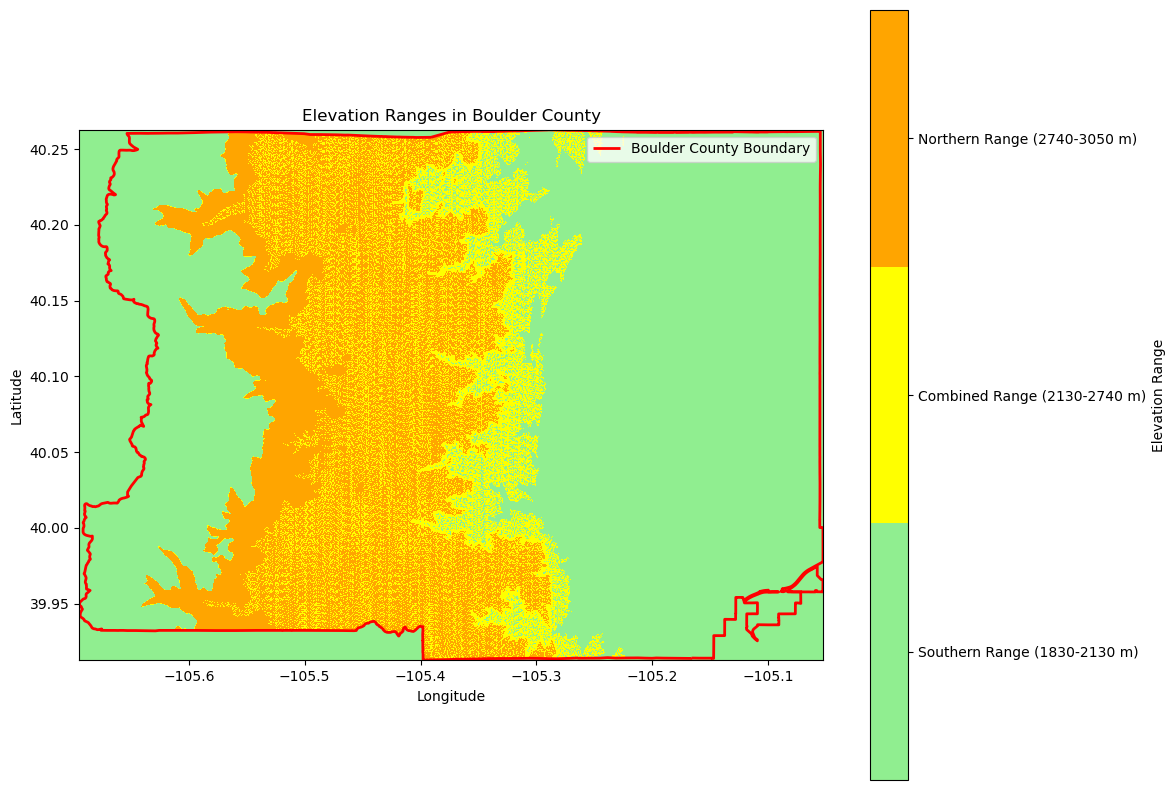

In [29]:
# another ChatGPT pass
# To highlight the elevation ranges (1830–2130 m as "Southern Range," 2130–2740 m as "Combined Range," 
# and 2740–3050 m as "Northern Range") in the DEM, you can use a custom colormap 
# and add a color-coded overlay for the ranges. Below is the modified code:

import rasterio
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from rasterio.mask import mask
from shapely.geometry import mapping
from matplotlib.colors import ListedColormap

# Load the Boulder County shapefile
boulder_gdf = gpd.read_file("./boulder_county.shp")

# Filepath to the DEM file (replace with your DEM source file path)
dem_filepath = "./dem/SRTMGL1_NC.003_SRTMGL1_DEM_doy2000042_aid0001.tif"

# Open the DEM file
with rasterio.open(dem_filepath) as src:
    # Reproject Boulder County boundary to the DEM CRS
    dem_crs = src.crs  # CRS of the DEM
    boulder_reproject_gdf = boulder_gdf.to_crs(dem_crs)
    
    # Create a geometry mask for Boulder County
    boulder_geometry = [mapping(boulder_reproject_gdf.unary_union)]
    
    # Mask the DEM to only include data within Boulder County
    dem_data, out_transform = mask(src, boulder_geometry, crop=True)
    dem_data = dem_data[0]  # Extract the first band (assuming single-band data)
    meta = src.meta.copy()
    meta.update(
        {
            "driver": "GTiff",
            "height": dem_data.shape[0],
            "width": dem_data.shape[1],
            "transform": out_transform,
        }
    )

# Replace no-data values (if any) with NaN
nodata_value = meta.get("nodata", None)
if nodata_value is not None:
    dem_data = np.where(dem_data == nodata_value, np.nan, dem_data)

# Define elevation ranges
southern_range = (1830, 2130)  # Southern Range (6000-7000 ft)
combined_range = (2130, 2740)  # Combined Range (7000-9000 ft)
northern_range = (2740, 3050)  # Northern Range (9000-10000 ft)

# Create a mask for each range
southern_mask = (dem_data >= southern_range[0]) & (dem_data < southern_range[1])
combined_mask = (dem_data >= combined_range[0]) & (dem_data < combined_range[1])
northern_mask = (dem_data >= northern_range[0]) & (dem_data < northern_range[1])

# Create a new array for highlighting
highlighted_dem = np.zeros_like(dem_data)
highlighted_dem[southern_mask] = 1  # Southern Range
highlighted_dem[combined_mask] = 2  # Combined Range
highlighted_dem[northern_mask] = 3  # Northern Range

# Define a custom colormap
colors = ["lightgreen", "yellow", "orange"]
custom_cmap = ListedColormap(colors)

# Plot the DEM data with highlighted ranges
fig, ax = plt.subplots(figsize=(12, 10))

# Plot the highlighted DEM ranges
highlight_img = ax.imshow(
    highlighted_dem,
    cmap=custom_cmap,
    extent=(
        out_transform[2],
        out_transform[2] + out_transform[0] * dem_data.shape[1],
        out_transform[5] + out_transform[4] * dem_data.shape[0],
        out_transform[5],
    ),
    origin="upper",
)

# Plot Boulder County boundary
boulder_reproject_gdf.boundary.plot(ax=ax, edgecolor="red", linewidth=2, label="Boulder County Boundary")

# Add labels, colorbar, and legend
cbar = plt.colorbar(highlight_img, ax=ax, ticks=[0.5, 1.5, 2.5], boundaries=[0, 1, 2, 3])
cbar.ax.set_yticklabels(["Southern Range (1830-2130 m)", "Combined Range (2130-2740 m)", "Northern Range (2740-3050 m)"])
cbar.set_label("Elevation Range")
ax.legend()
plt.title("Elevation Ranges in Boulder County")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()
